In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
!ls dataset/Tomato_Leaf_Diseases/

Testing_Set  Training_Set


In [3]:
train_data_path = "dataset/Tomato_Leaf_Diseases/Training_Set/"
test_data_path = "dataset/Tomato_Leaf_Diseases/Testing_Set/"

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
valid_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
testing_set = valid_datagen.flow_from_directory(test_data_path,
                                            target_size = (224, 224),
                                            batch_size = 70,
                                            class_mode = 'categorical')

Found 7001 images belonging to 5 classes.


In [7]:
physical_devices = tf.config.experimental.list_physical_devices("GPU")
print(physical_devices)
tf.config.experimental.set_memory_growth(physical_devices[0], True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [8]:
model = keras.models.load_model("0.97test_accuracy")

In [9]:
model.evaluate(testing_set)

101/101 [==============================] - 206s 2s/step - loss: 0.0765 - accuracy: 0.9744


[0.07652722299098969, 0.9744322299957275]

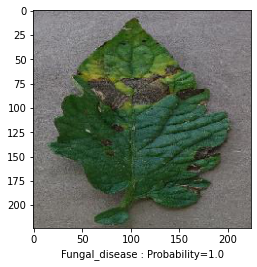

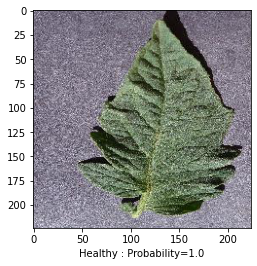

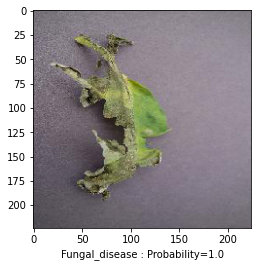

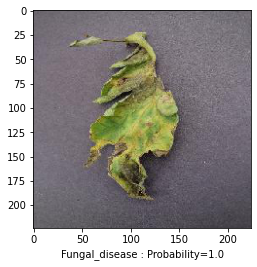

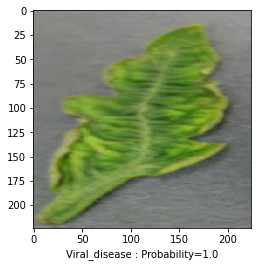

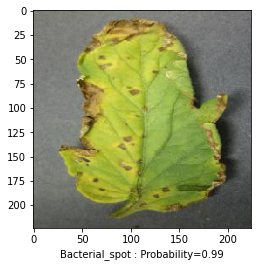

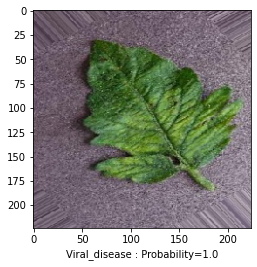

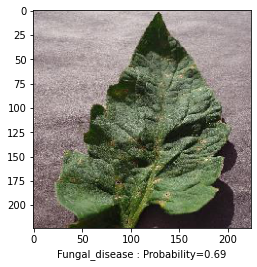

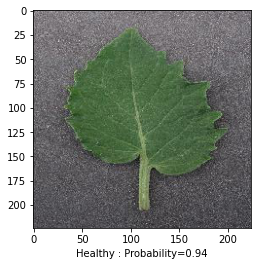

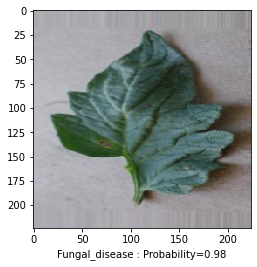

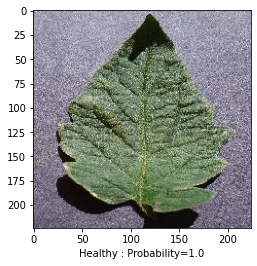

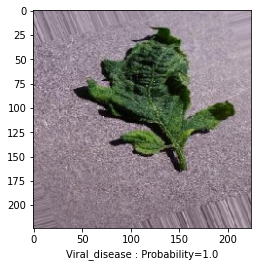

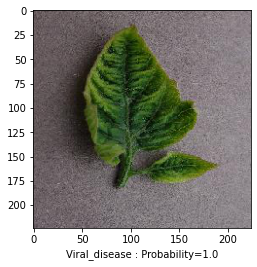

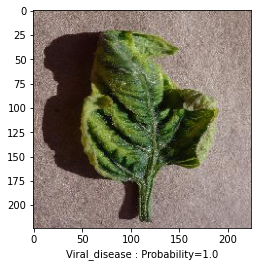

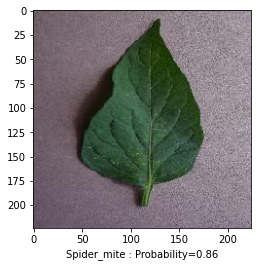

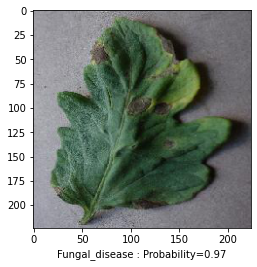

In [12]:
import matplotlib.pyplot as plt
a = next(testing_set)
import numpy as np
prediction = model.predict(a[0])
for im, i in zip(a[0][:16], range(16)):
    plt.figure()
    plt.imshow(im)
    pp = i
    lis = []
    for i in prediction[pp]:
        lis.append(round(i, 2))
    prob = max(lis)

    plt.xlabel(list(testing_set.class_indices.keys())[np.argmax(prediction[pp])]+" : Probability="+str(prob))
    

#print(prediction)